In [3]:
# !pip install tensorflow==2.4.1 opencv-python matplotlib
https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=ef6e1e72d97d65de75358ce42275e4fbe101bbbb99eb6607f78ee24bb71f270a
  Stored in directory: c:\users\wkw62\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37

ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\wkw62\\Anaconda3\\envs\\fri_rl\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.




  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached py

##### 
link: https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/3


In [32]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt
import cv2

In [2]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()
# preallocate tensors

##### Make Detections


In [45]:
cap = cv2.VideoCapture(0) #connect the web cam, or video "file_name"
while cap.isOpened():
    ret, frame = cap.read()  #fram- image
    cv2.imshow('MoveNet Lightning',frame)
    #input: A frame of video or an image, represented as an 
    #float32 tensor of shape: 192x192x3. Channels order: RGB with values in [0, 255].
    #reshape
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img,axis=0),192,192)
    input_image = tf.cast(img, dtype = tf.float32)
    
    # setup input and output
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # make predictions
    interpreter.set_tensor(input_details[0]['index'],np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]["index"])
    print(keypoints_with_scores)

    #exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    


[[[[0.4041631  0.46205124 0.7572497 ]
   [0.33616513 0.5269121  0.75604904]
   [0.3478582  0.38367295 0.7909874 ]
   [0.4130171  0.6184855  0.66871417]
   [0.4346041  0.30733484 0.5801176 ]
   [0.6959972  0.780552   0.4224435 ]
   [0.71578836 0.15275607 0.5579276 ]
   [0.69533026 0.9206177  0.13389516]
   [0.8497569  0.01846091 0.10815641]
   [0.68118453 0.7557721  0.02255225]
   [0.64577705 0.03293713 0.06312868]
   [0.938044   0.7426435  0.01719552]
   [0.7209456  0.9373983  0.03227675]
   [0.66849136 0.9250822  0.16236937]
   [0.6641263  0.910715   0.18739536]
   [0.70888007 0.9409437  0.05640468]
   [0.707138   0.9276129  0.06017676]]]]
[[[[0.40281987 0.46507144 0.7598547 ]
   [0.33655602 0.5292686  0.7137855 ]
   [0.34678918 0.38581836 0.7809885 ]
   [0.41402432 0.61930895 0.6551651 ]
   [0.4366181  0.30598697 0.46259376]
   [0.69791406 0.77890915 0.44874266]
   [0.70751923 0.15388022 0.69962597]
   [0.6919879  0.91561407 0.14904177]
   [0.8530552  0.02188181 0.09864575]
   [0.681

[[[[0.40482366 0.4505369  0.84083855]
   [0.33531794 0.52099377 0.7083036 ]
   [0.34679615 0.3781126  0.7408768 ]
   [0.41300642 0.6161348  0.65786266]
   [0.433474   0.30878597 0.5596553 ]
   [0.70598936 0.7969813  0.44205254]
   [0.71427166 0.15295056 0.579767  ]
   [0.84904236 0.8351816  0.10935733]
   [0.85767645 0.02532066 0.10300332]
   [0.7338253  0.92021203 0.08643469]
   [0.61773825 0.02629611 0.05709758]
   [0.99325866 0.7433605  0.02673849]
   [0.99025905 0.3520255  0.00540832]
   [0.66374946 0.91803545 0.12189522]
   [0.67224264 0.22918718 0.00885016]
   [0.43777773 0.6554566  0.02720818]
   [0.6019914  0.0215597  0.02492225]]]]
[[[[0.40606397 0.45063186 0.8526195 ]
   [0.3366855  0.5214311  0.67745966]
   [0.34936208 0.3787174  0.7981157 ]
   [0.41265225 0.61886346 0.62174207]
   [0.43331373 0.30788094 0.5491021 ]
   [0.70777553 0.80122983 0.4333915 ]
   [0.7062757  0.15783368 0.7279097 ]
   [0.84949493 0.845695   0.08513463]
   [0.8589563  0.02516212 0.09077278]
   [0.730

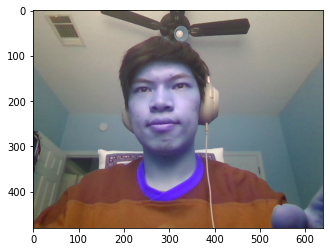

In [30]:
plt.imshow(frame)

In [42]:
#preprocess input
# img = frame.copy()
# img = tf.image.resize_with_pad(np.expand_dims(img, axis=0),192,192)
# input_image = tf.cast(np.squeeze(img), dtype = tf.float32)
# plt.imshow(input_image)   #to show image change the dtype above to int32

In [46]:
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()


In [47]:
interpreter.set_tensor(input_details[0]['index'],np.array(input_image))
interpreter.invoke()
keypoints_with_scores = interpreter.get_tensor(output_details[0]["index"])
print(keypoints_with_scores) #output yx coordinate


[[[[0.40557727 0.45195287 0.83947945]
   [0.33544892 0.522424   0.5864923 ]
   [0.34848255 0.37901825 0.78019094]
   [0.4137689  0.61760104 0.6418675 ]
   [0.43364164 0.30841938 0.55832005]
   [0.69497013 0.7919481  0.5054452 ]
   [0.70949805 0.15564425 0.76283985]
   [0.6896192  0.91099954 0.11204949]
   [0.85488194 0.0218132  0.10095957]
   [0.839962   0.8399593  0.07137781]
   [0.6367529  0.02942896 0.05785474]
   [0.9946791  0.75879395 0.02664047]
   [0.73588514 0.9335985  0.02311692]
   [0.65786946 0.9140023  0.11797515]
   [0.66897666 0.22837284 0.00922346]
   [0.44267637 0.656042   0.02424818]
   [0.6037346  0.02217933 0.02600187]]]]


# 
The first two channels of the last dimension represents the yx coordinates (normalized to image frame, i.e. range in [0.0, 1.0]) of the 17 keypoints (in the order of: [nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle]).



In [27]:
left_eye = keypoints_with_scores[0][0][1]
left_eye


array([0.3037321, 0.5294647, 0.7701572], dtype=float32)

In [28]:
np.array(left_eye[:2]*[480,640]).astype(int) #normalize to pixel position

array([145, 338])